In [1]:
library("visualizeR")

quantity2clim <- function(quantity, what, ref.grid, backperm = NULL) {
  if(!is.null(backperm)){quantity <- quantity[backperm]}
  mat <- matrix(quantity, nrow = 1)  
  ref.grid$Data <- mat2Dto3Darray(mat, x = ref.grid$xyCoords$x , y = ref.grid$xyCoords$y)
  attr(ref.grid$Data, "climatology:fun") <- what
  return(ref.grid)
}


Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.5) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

Warning message:
“no DISPLAY variable so Tk is not available”
visualizeR version 1.6.1 (2021-03-11) is loaded


Get the latest stable version (1.6.3) using <devtools::install_github('SantanderMetGroup/visualizeR')>

Please see 'citation("visualizeR")' to cite this package.



### BA masked

In [2]:
ba_025 <- get(load('../0.Data/MODIS_OLCI_ba_200101-202205.Rdata'))
ba_05 <- get(load('../1.Upscaling/upscaling_ba/ba_grid_05.Rdata'))
ba_1 <- get(load('../1.Upscaling/upscaling_ba/ba_grid_1.Rdata'))
ba_15 <- get(load('../1.Upscaling/upscaling_ba/ba_grid_15.Rdata'))
ba_2 <- get(load('../1.Upscaling/upscaling_ba/ba_grid_2.Rdata'))
ba_25 <- get(load('../1.Upscaling/upscaling_ba/ba_grid_25.Rdata'))
ba_3 <- get(load('../1.Upscaling/upscaling_ba/ba_grid_3.Rdata'))
ba_5 <- get(load('../1.Upscaling/upscaling_ba/ba_grid_5.Rdata'))

In [20]:
#ba_025 <- get(load('../0.Data/MODIS_OLCI_ba_200101-202205.Rdata'))
ba_05_df <- get(load('../3.Datos generados/dataframes/Con_FBA_masked/df_grid_05.Rdata'))
#ba_05_df <- ba_05_df[order(ba_05_df$X),]
ba_1_df <- get(load('../3.Datos generados/dataframes/Con_FBA_masked/df_grid_1.Rdata'))
ba_1_df <- ba_1_df[order(ba_1_df$X),]
ba_15_df <- get(load('../3.Datos generados/dataframes/Con_FBA_masked/df_grid_15.Rdata'))
ba_15_df <- ba_15_df[order(ba_15_df$X),]
ba_2_df <- get(load('../3.Datos generados/dataframes/Con_FBA_masked/df_grid_2.Rdata'))
ba_2_df <- ba_2_df[order(ba_2_df$X),]
ba_25_df <- get(load('../3.Datos generados/dataframes/Con_FBA_masked/df_grid_25.Rdata'))
ba_25_df <- ba_25_df[order(ba_25_df$X),]
ba_3_df <- get(load('../3.Datos generados/dataframes/Con_FBA_masked/df_grid_3.Rdata'))
ba_3_df <- ba_3_df[order(ba_3_df$X),]
ba_5_df <- get(load('../3.Datos generados/dataframes/Con_FBA_masked/df_grid_5.Rdata'))
ba_5_df <- ba_5_df[order(ba_5_df$X),]

In [21]:
series_ba_05_df <- get(load('../3.Datos generados/dataframes/df.series_grid_05.Rdata'))
series_ba_05_df <-series_ba_05_df[order(series_ba_05_df$coord_x),]
series_ba_1_df <- get(load('../3.Datos generados/dataframes/df.series_grid_1.Rdata'))
series_ba_1_df <-series_ba_1_df[order(series_ba_1_df$coord_x),]
series_ba_15_df <- get(load('../3.Datos generados/dataframes/df.series_grid_15.Rdata'))
series_ba_15_df <-series_ba_15_df[order(series_ba_15_df$coord_x),]
series_ba_2_df <- get(load('../3.Datos generados/dataframes/df.series_grid_2.Rdata'))
series_ba_2_df <-series_ba_2_df[order(series_ba_2_df$coord_x),]
series_ba_25_df <- get(load('../3.Datos generados/dataframes/df.series_grid_25.Rdata'))
series_ba_25_df <-series_ba_25_df[order(series_ba_25_df$coord_x),]
series_ba_3_df <- get(load('../3.Datos generados/dataframes/df.series_grid_3.Rdata'))
series_ba_3_df <-series_ba_3_df[order(series_ba_3_df$coord_x),]
series_ba_5_df <- get(load('../3.Datos generados/dataframes/df.series_grid_5.Rdata'))
series_ba_5_df <-series_ba_5_df[order(series_ba_5_df$coord_x),]

In [22]:
series_ba_05_df <- cbind(series_ba_05_df, 'FBA' = ba_05_df$FBA)
series_ba_1_df <- cbind(series_ba_1_df, 'FBA' = ba_1_df$FBA)
series_ba_15_df <- cbind(series_ba_15_df, 'FBA' = ba_15_df$FBA)
series_ba_2_df <- cbind(series_ba_2_df, 'FBA' = ba_2_df$FBA)
series_ba_25_df <- cbind(series_ba_25_df, 'FBA' = ba_25_df$FBA)
series_ba_3_df <- cbind(series_ba_3_df, 'FBA' = ba_3_df$FBA)
series_ba_5_df <- cbind(series_ba_5_df, 'FBA' = ba_5_df$FBA)

In [23]:
series_ba_05_df$RowMeans<-rowMeans(series_ba_05_df[,3:14],na.rm=TRUE)
series_ba_1_df$RowMeans<-rowMeans(series_ba_1_df[,3:14],na.rm=TRUE)
series_ba_15_df$RowMeans<-rowMeans(series_ba_15_df[,3:14],na.rm=TRUE)
series_ba_2_df$RowMeans<-rowMeans(series_ba_2_df[,3:14],na.rm=TRUE)
series_ba_25_df$RowMeans<-rowMeans(series_ba_25_df[,3:14],na.rm=TRUE)
series_ba_3_df$RowMeans<-rowMeans(series_ba_3_df[,3:14],na.rm=TRUE)
series_ba_5_df$RowMeans<-rowMeans(series_ba_5_df[,3:14],na.rm=TRUE)

In [24]:
series_ba_05_df$RowMeans[series_ba_05_df$FBA == 0] = NA
series_ba_1_df$RowMeans[series_ba_1_df$FBA == 0] = NA
series_ba_15_df$RowMeans[series_ba_15_df$FBA == 0] = NA
series_ba_2_df$RowMeans[series_ba_2_df$FBA == 0] = NA
series_ba_25_df$RowMeans[series_ba_25_df$FBA == 0] = NA
series_ba_3_df$RowMeans[series_ba_3_df$FBA == 0] = NA
series_ba_5_df$RowMeans[series_ba_5_df$FBA == 0] = NA

In [25]:
series_ba_05_df_clim <- quantity2clim(quantity = series_ba_05_df$RowMeans, what = 'Ba_masked', ref.grid = ba_05)
series_ba_1_df_clim <- quantity2clim(quantity = series_ba_1_df$RowMeans, what = 'Ba_masked', ref.grid = ba_1)
series_ba_15_df_clim <- quantity2clim(quantity = series_ba_15_df$RowMeans, what = 'Ba_masked', ref.grid = ba_15)
series_ba_2_df_clim <- quantity2clim(quantity = series_ba_2_df$RowMeans, what = 'Ba_masked', ref.grid = ba_2)
series_ba_25_df_clim <- quantity2clim(quantity = series_ba_25_df$RowMeans, what = 'Ba_masked', ref.grid = ba_25)
series_ba_3_df_clim <- quantity2clim(quantity = series_ba_3_df$RowMeans, what = 'Ba_masked', ref.grid = ba_3)
series_ba_5_df_clim <- quantity2clim(quantity = series_ba_5_df$RowMeans, what = 'Ba_masked', ref.grid = ba_5)

In [26]:
#ba_025.clim_plot <- spatialPlot(ba_025.clim, backdrop.theme = 'coastline')
ba_05.clim_plot <- spatialPlot(series_ba_05_df_clim, backdrop.theme = 'coastline')
ba_1.clim_plot <- spatialPlot(series_ba_1_df_clim, backdrop.theme = 'coastline')
ba_15.clim_plot <- spatialPlot(series_ba_15_df_clim, backdrop.theme = 'coastline')
ba_2.clim_plot <- spatialPlot(series_ba_2_df_clim, backdrop.theme = 'coastline')
ba_25.clim_plot <- spatialPlot(series_ba_25_df_clim, backdrop.theme = 'coastline')
ba_3.clim_plot <- spatialPlot(series_ba_3_df_clim, backdrop.theme = 'coastline')
ba_5.clim_plot <- spatialPlot(series_ba_5_df_clim, backdrop.theme = 'coastline')

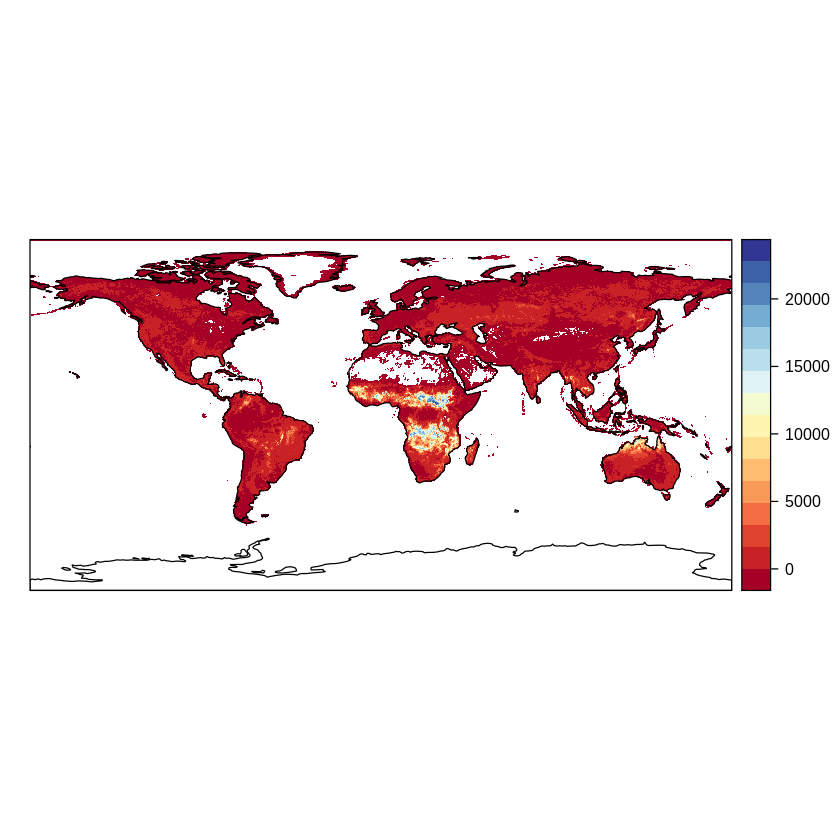

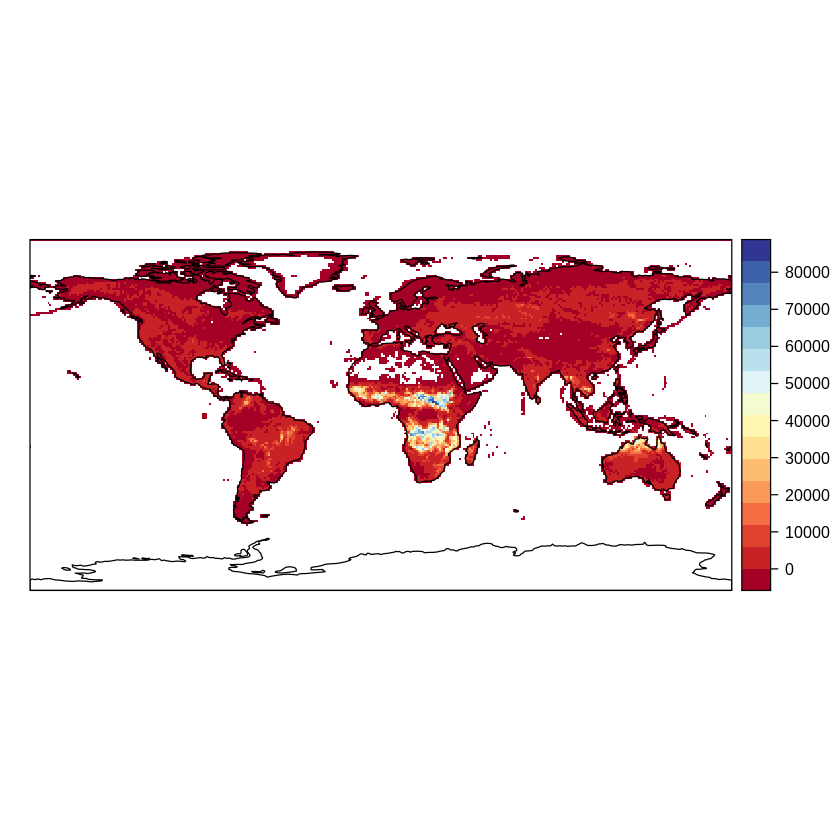

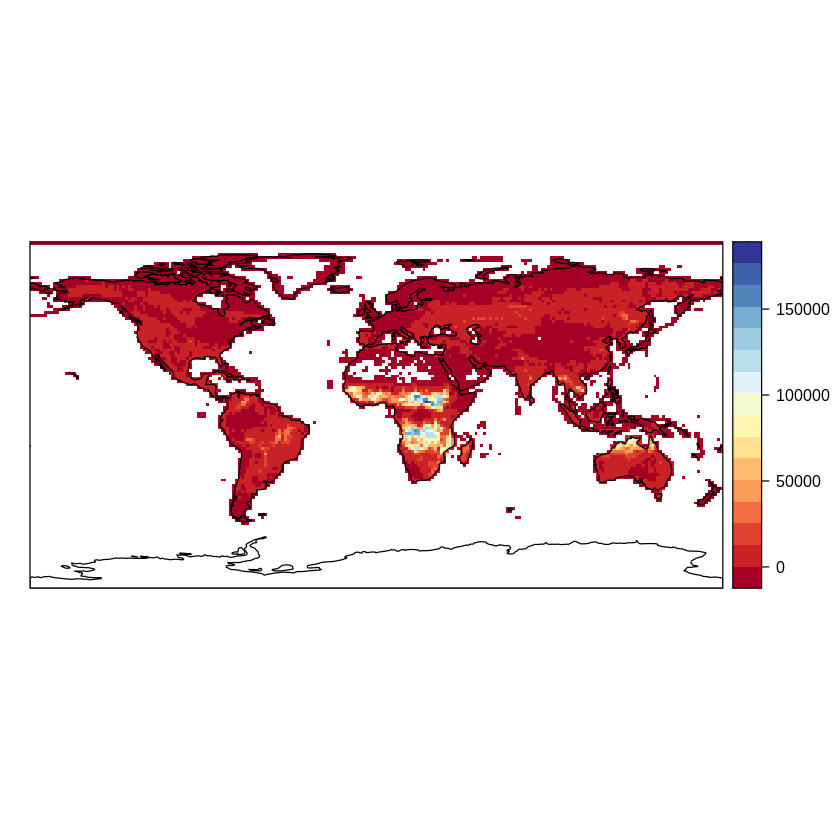

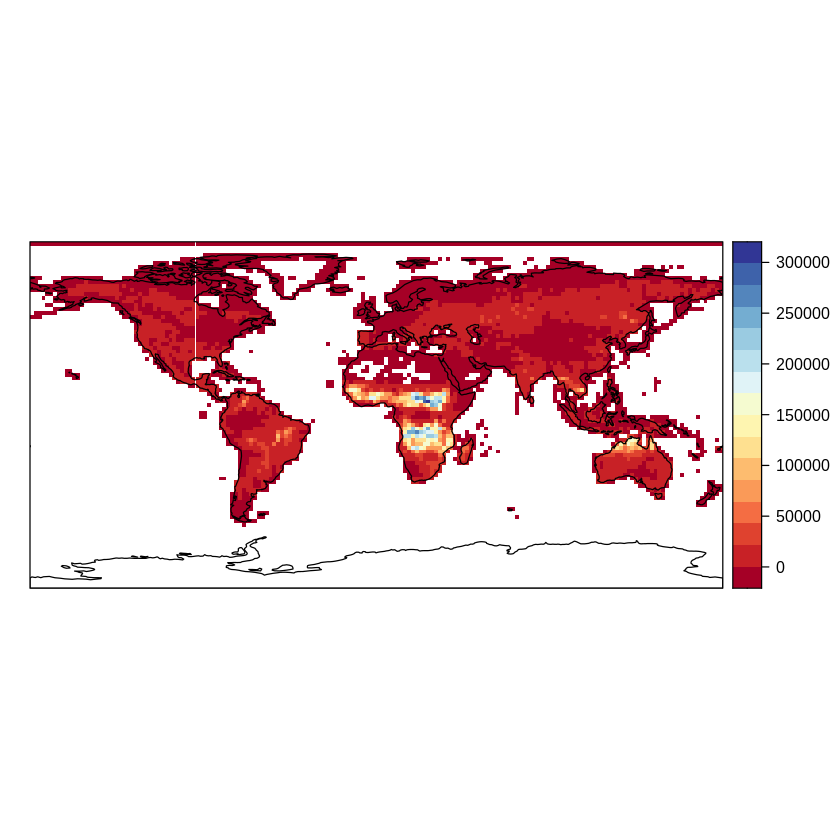

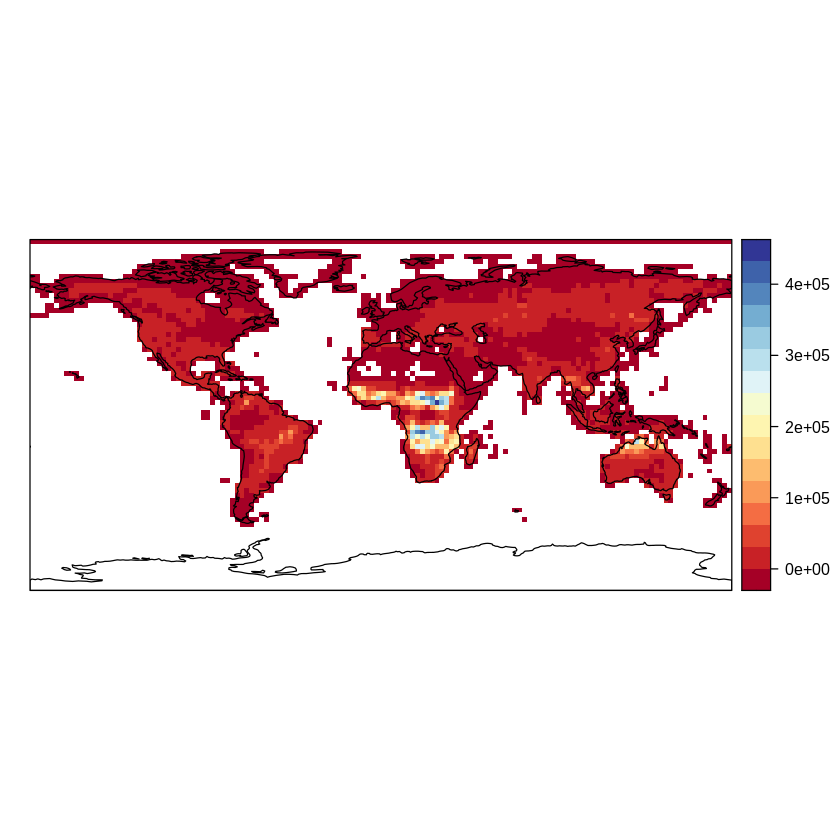

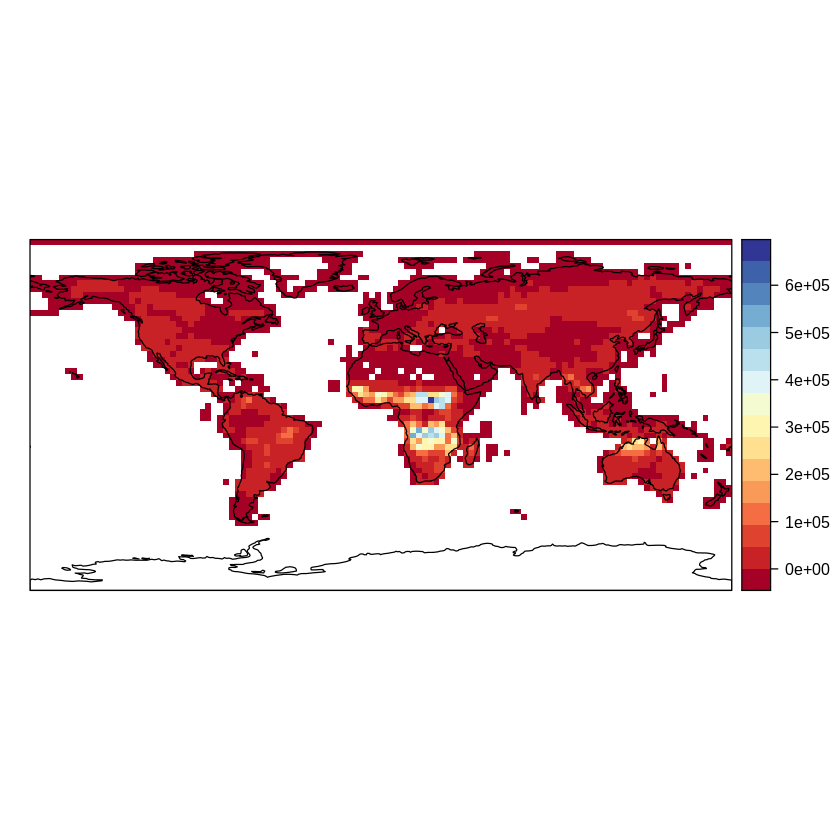

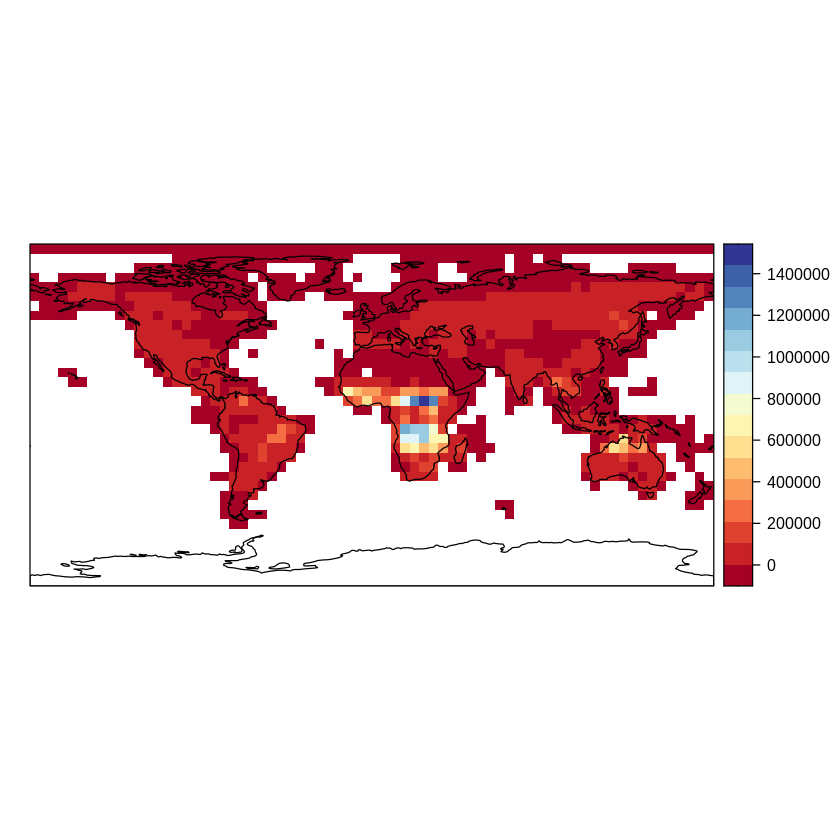

In [27]:
ba_05.clim_plot
ba_1.clim_plot
ba_15.clim_plot
ba_2.clim_plot
ba_25.clim_plot
ba_3.clim_plot
ba_5.clim_plot

In [30]:
plotname <- 'clims_ba_mapa.pdf'
pdf(plotname)
ba_05.clim_plot
ba_1.clim_plot
ba_15.clim_plot
ba_2.clim_plot
ba_25.clim_plot
ba_3.clim_plot
ba_5.clim_plot
dev.off()

png 
  2

### FBA

In [13]:
fba_025 <- get(load('../1.Upscaling/upscaling_fba_masked/masked_fba_grid_025.Rdata'))
fba_05 <- get(load('../1.Upscaling/upscaling_fba_masked/masked_fba_grid_05.Rdata'))
fba_1 <- get(load('../1.Upscaling/upscaling_fba_masked/masked_fba_grid_1.Rdata'))
fba_15 <- get(load('../1.Upscaling/upscaling_fba_masked/masked_fba_grid_15.Rdata'))
fba_2 <- get(load('../1.Upscaling/upscaling_fba_masked/masked_fba_grid_2.Rdata'))
fba_25 <- get(load('../1.Upscaling/upscaling_fba_masked/masked_fba_grid_25.Rdata'))
fba_3 <- get(load('../1.Upscaling/upscaling_fba_masked/masked_fba_grid_3.Rdata'))
fba_5 <- get(load('../1.Upscaling/upscaling_fba_masked/masked_fba_grid_5.Rdata'))

In [14]:
fba_025.clim <- climatology(fba_025)
fba_05.clim <- climatology(fba_05)
fba_1.clim <- climatology(fba_1)
fba_15.clim <- climatology(fba_15)
fba_2.clim <- climatology(fba_2)
fba_25.clim <- climatology(fba_25)
fba_3.clim <- climatology(fba_3)
fba_5.clim <- climatology(fba_5)

[2023-09-26 08:43:58] - Computing climatology...

[2023-09-26 08:44:43] - Done.

[2023-09-26 08:44:46] - Computing climatology...

[2023-09-26 08:44:58] - Done.

[2023-09-26 08:44:59] - Computing climatology...

[2023-09-26 08:45:01] - Done.

[2023-09-26 08:45:01] - Computing climatology...

[2023-09-26 08:45:02] - Done.

[2023-09-26 08:45:02] - Computing climatology...

[2023-09-26 08:45:03] - Done.

[2023-09-26 08:45:03] - Computing climatology...

[2023-09-26 08:45:03] - Done.

[2023-09-26 08:45:04] - Computing climatology...

[2023-09-26 08:45:04] - Done.

[2023-09-26 08:45:04] - Computing climatology...

[2023-09-26 08:45:04] - Done.



In [15]:
fba_025.clim_plot <- spatialPlot(fba_025.clim, backdrop.theme = 'coastline')
fba_05.clim_plot <- spatialPlot(fba_05.clim, backdrop.theme = 'coastline')
fba_1.clim_plot <- spatialPlot(fba_1.clim, backdrop.theme = 'coastline')
fba_15.clim_plot <- spatialPlot(fba_15.clim, backdrop.theme = 'coastline')
fba_2.clim_plot <- spatialPlot(fba_2.clim, backdrop.theme = 'coastline')
fba_25.clim_plot <- spatialPlot(fba_25.clim, backdrop.theme = 'coastline')
fba_3.clim_plot <- spatialPlot(fba_3.clim, backdrop.theme = 'coastline')
fba_5.clim_plot <- spatialPlot(fba_5.clim, backdrop.theme = 'coastline')

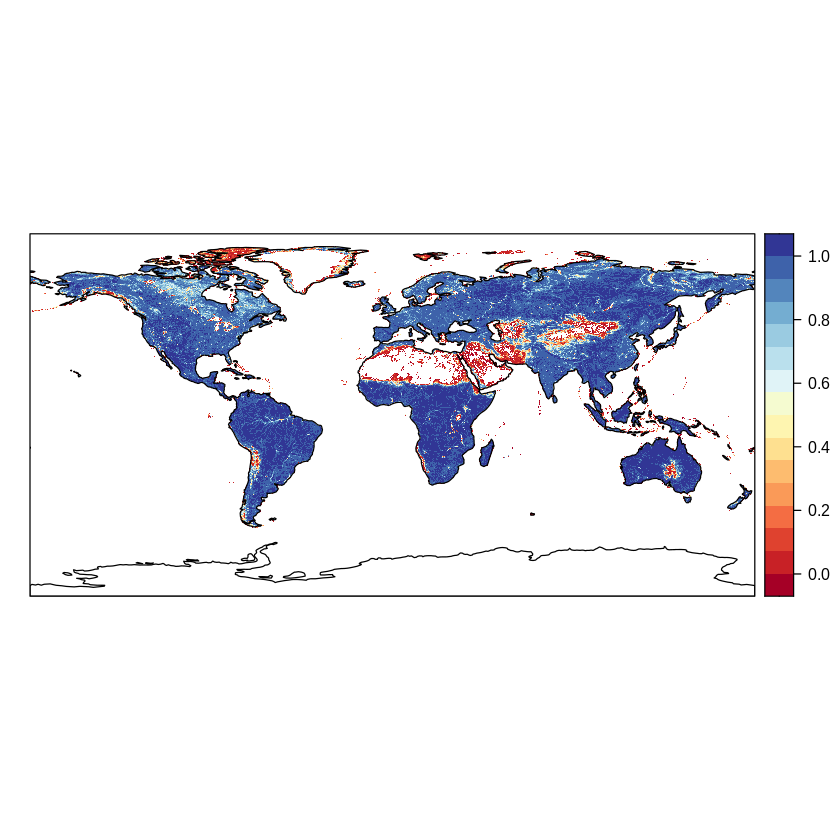

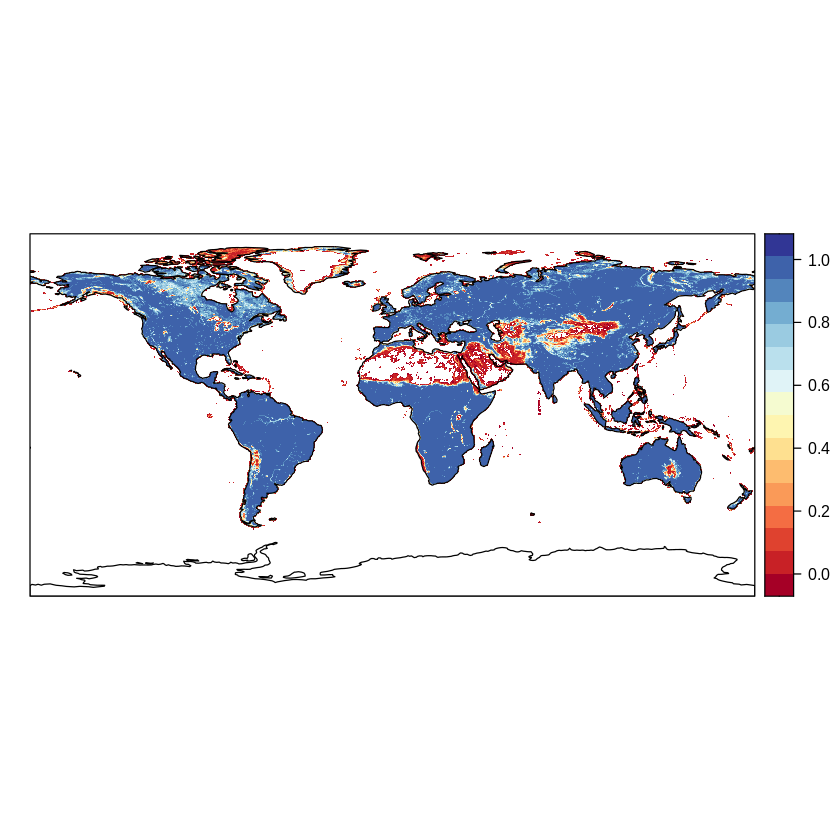

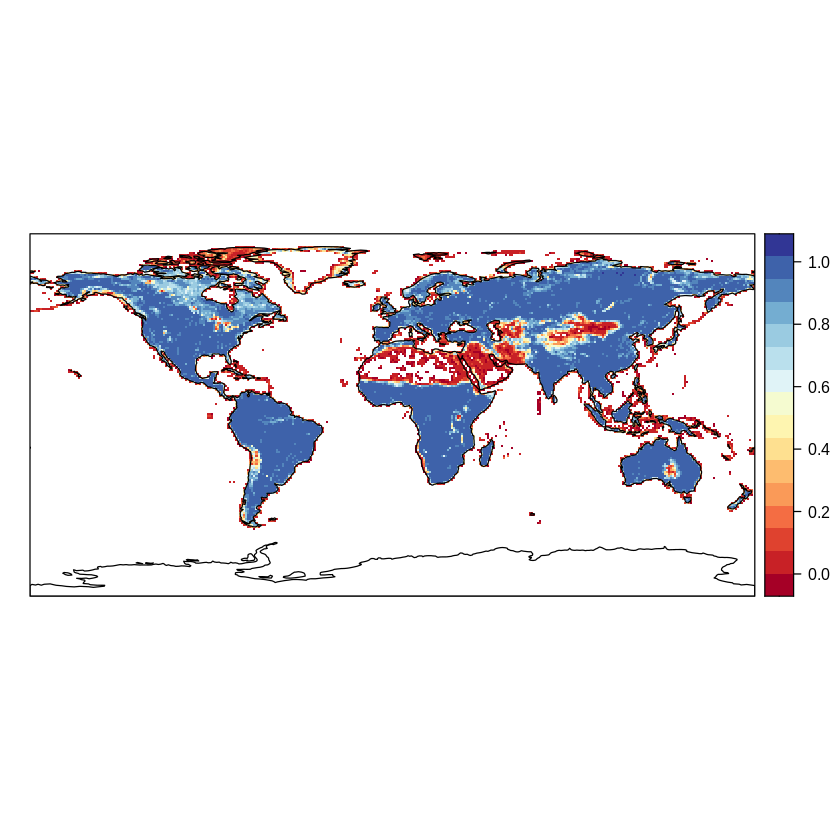

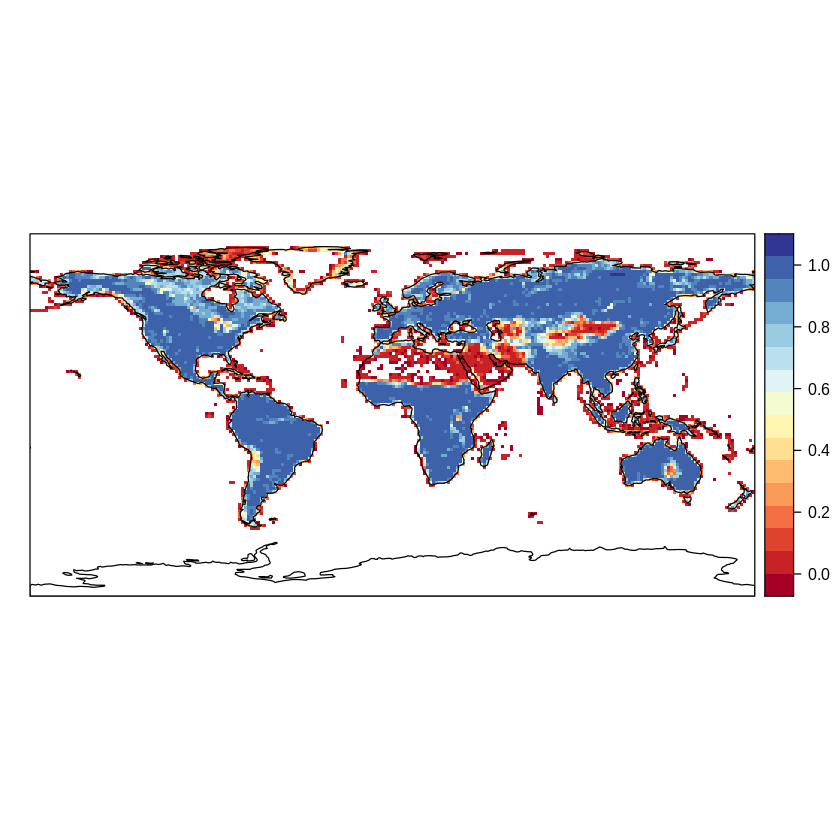

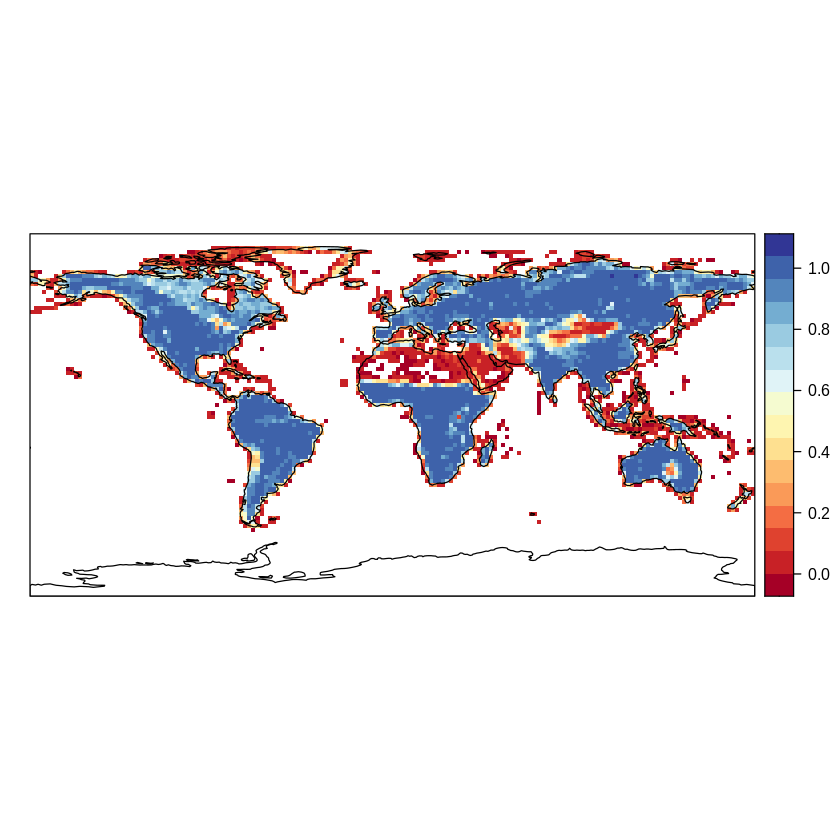

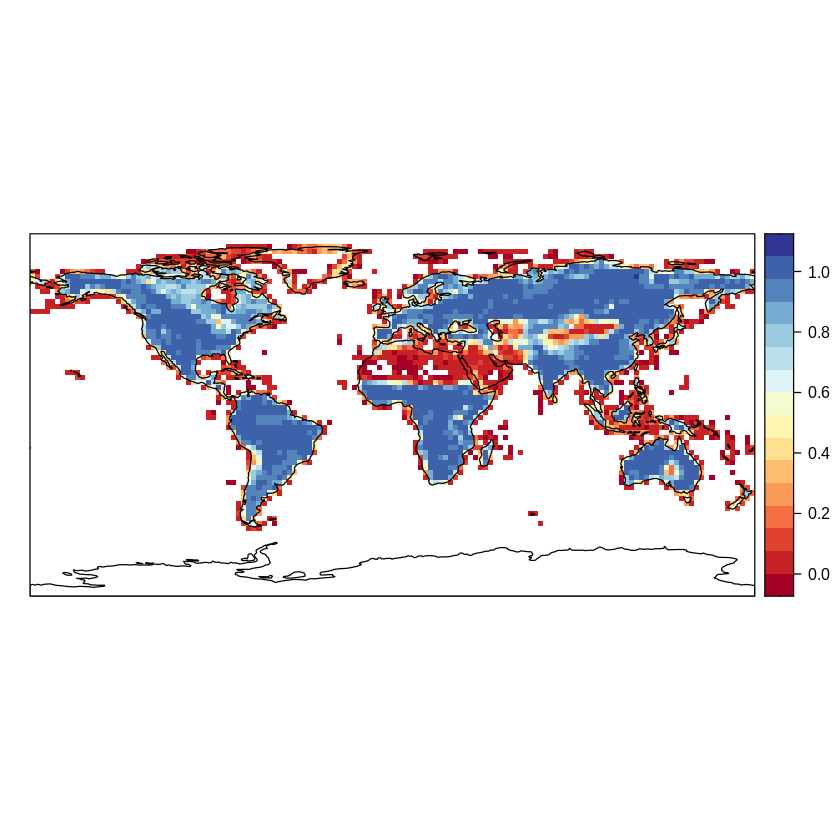

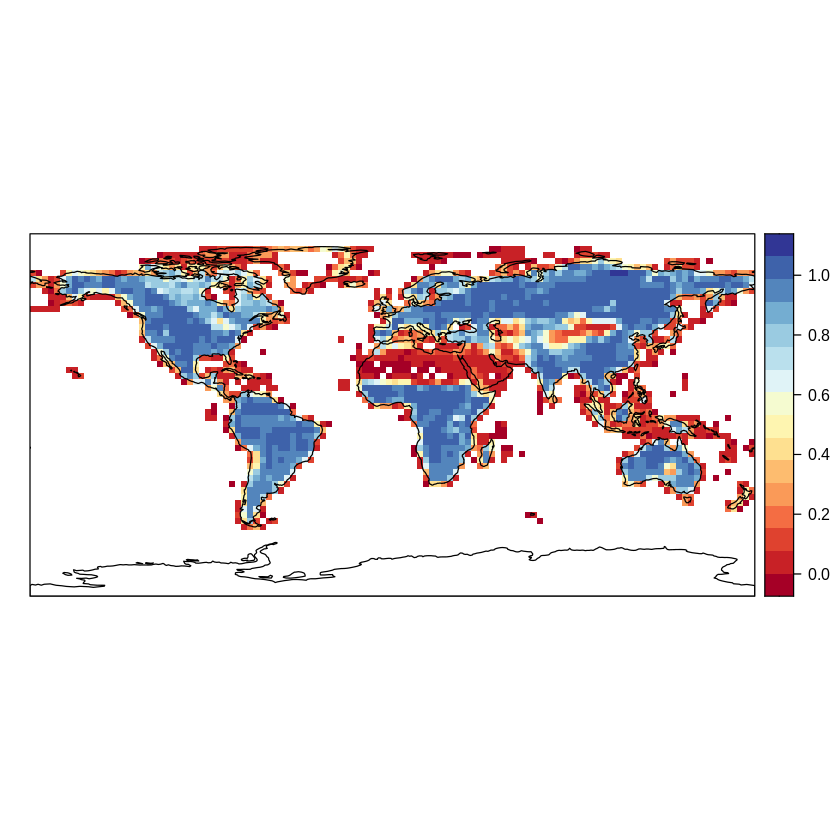

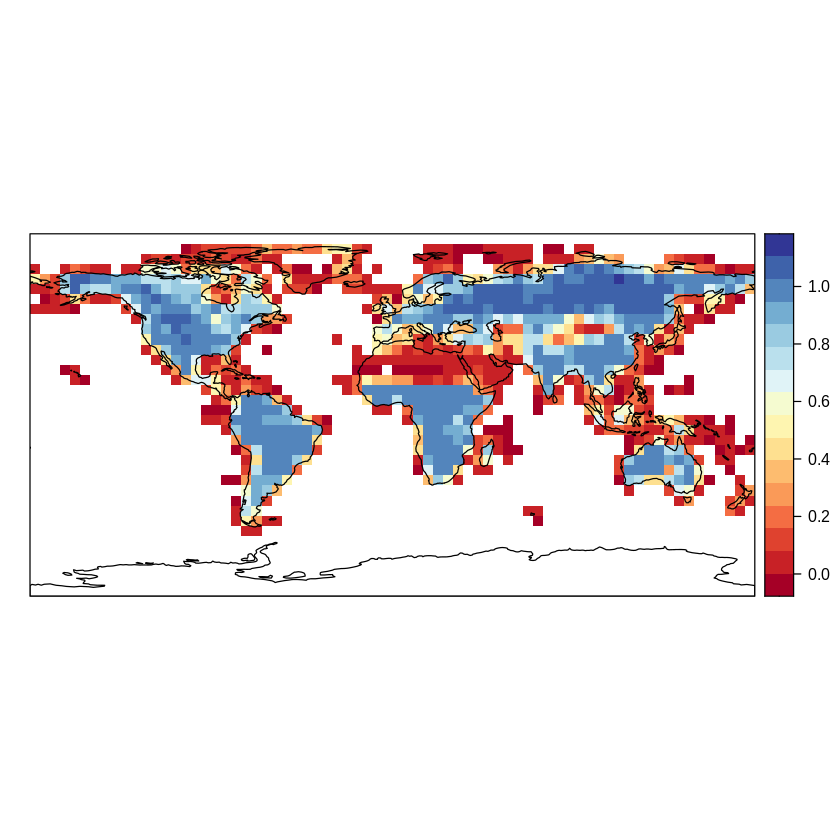

In [16]:
fba_025.clim_plot
fba_05.clim_plot
fba_1.clim_plot
fba_15.clim_plot
fba_2.clim_plot
fba_25.clim_plot
fba_3.clim_plot
fba_5.clim_plot

In [29]:
plotname <- 'clims_fba_mapa.pdf'
pdf(plotname)
fba_05.clim_plot
fba_1.clim_plot
fba_15.clim_plot
fba_2.clim_plot
fba_25.clim_plot
fba_3.clim_plot
fba_5.clim_plot
dev.off()

png 
  2